In [ ]:
Decision Tree (Multi-variate)
The Task
Import the dataset_cleaned.csv file.
Remove all columns apart from Date, City name (Features), and Average Price (Target)
Split data intro train and test sections
Scatter plot the Date to the Average Price, color coding City Names
Fit a Decision Tree model to the training data
Evaluate against testing data

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
# Import the data
data = pd.read_csv("dataset_cleaned.csv")
print(data.columns)
data.head()
data.head()

Index(['Date', 'RegionName', '1m%Change', '12m%Change', 'SalesVolume',
       'DetachedPrice', 'SemiDetachedPrice', 'TerracedPrice', 'FlatPrice',
       'MortgagePrice', 'New12m%Change', 'Old12m%Change', 'AveragePrice'],
      dtype='object')


,Date,RegionName,1m%Change,12m%Change,SalesVolume,DetachedPrice,SemiDetachedPrice,TerracedPrice,FlatPrice,MortgagePrice,New12m%Change,Old12m%Change,AveragePrice
0,1995-01-01,City of London,NaN,NaN,17.0,NaN,NaN,NaN,91484.42509,NaN,NaN,NaN,91448.98487
1,1995-02-01,City of London,-10.110787,NaN,7.0,NaN,NaN,NaN,82173.08270,NaN,NaN,NaN,82202.77314
2,1995-03-01,City of London,-3.749351,NaN,14.0,NaN,NaN,NaN,79069.30190,NaN,NaN,NaN,79120.70256
3,1995-04-01,City of London,-2.552422,NaN,7.0,NaN,NaN,NaN,77048.93662,NaN,NaN,NaN,77101.20804
4,1995-05-01,City of London,9.478375,NaN,10.0,NaN,NaN,NaN,84395.09568,NaN,NaN,NaN,84409.14932


In [5]:
# Numerify the data 

# Changing dates to numeric value of format YYYY.MMDD (e.g. 2020-01-01 will change to 2020.0101)
# Reference for parsing data strings and changing to numbers: https://stackoverflow.com/questions/50863691/pandas-convert-date-object-to-int
data['Date'] = data['Date'].str.replace("-","").astype(int)
data['Date'] = data['Date'] / 10000 

# Changing all Cities to Numbers based on the city_to_number dictionary (e.g. City of London will be changed to 1)
# Reference for dictionary idea: https://stackoverflow.com/questions/17114904/python-pandas-replacing-strings-in-dataframe-with-numbers
city_to_number = {"City of London":1, "Manchester":2, "Birmingham":3, "Leeds":4, "Liverpool":5, "Bradford":6, "Sheffield":7}
data = data.applymap(lambda s: city_to_number.get(s) if s in city_to_number else s)

data.tail()

,Date,RegionName,1m%Change,12m%Change,SalesVolume,DetachedPrice,SemiDetachedPrice,TerracedPrice,FlatPrice,MortgagePrice,New12m%Change,Old12m%Change,AveragePrice
2151,2020.0401,7,-2.080994,1.032836,199.0,289107.4777,180767.1848,143378.1739,110435.4644,170296.3800,1.531751,1.060767,166206.2261
2152,2020.0501,7,-1.252210,0.052515,265.0,285996.2328,178752.1814,141354.8444,108839.3973,168172.3800,3.311776,-0.192567,164124.9759
2153,2020.0601,7,0.095138,-0.641781,382.0,286280.1560,179108.3282,141637.3065,108444.6743,168381.9519,2.648745,-0.852847,164281.1218
2154,2020.0701,7,2.767299,2.021214,NaN,293134.4883,184392.7465,145626.4349,111290.2417,173105.4630,NaN,NaN,168827.2720
2155,2020.0801,7,0.377327,2.415231,NaN,294264.0989,185366.6967,146439.4034,110912.5546,173883.3993,NaN,NaN,169464.3033


In [6]:
# Replace empty cells with mean of column

#Function retrieved from Lab 6
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)

for col_name in data.columns:
    missing_median(data, col_name)

data.head()

,Date,RegionName,1m%Change,12m%Change,SalesVolume,DetachedPrice,SemiDetachedPrice,TerracedPrice,FlatPrice,MortgagePrice,New12m%Change,Old12m%Change,AveragePrice
0,1995.0101,1,0.448962,4.993125,17.0,208089.416,131393.91215,102780.9632,91484.42509,148290.88145,5.05718,5.09653,91448.98487
1,1995.0201,1,-10.110787,4.993125,7.0,208089.416,131393.91215,102780.9632,82173.08270,148290.88145,5.05718,5.09653,82202.77314
2,1995.0301,1,-3.749351,4.993125,14.0,208089.416,131393.91215,102780.9632,79069.30190,148290.88145,5.05718,5.09653,79120.70256
3,1995.0401,1,-2.552422,4.993125,7.0,208089.416,131393.91215,102780.9632,77048.93662,148290.88145,5.05718,5.09653,77101.20804
4,1995.0501,1,9.478375,4.993125,10.0,208089.416,131393.91215,102780.9632,84395.09568,148290.88145,5.05718,5.09653,84409.14932


In [7]:
# Split Features from Target
feature_cols = []

for col_name in data.columns:
    if(col_name != "AveragePrice"):
        feature_cols.append(col_name)

features = data[feature_cols]
target = data["AveragePrice"]

# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=10)

X_train.head()

,Date,RegionName,1m%Change,12m%Change,SalesVolume,DetachedPrice,SemiDetachedPrice,TerracedPrice,FlatPrice,MortgagePrice,New12m%Change,Old12m%Change
24,1997.0101,1,9.317795,6.738266,22.0,208089.41600,131393.91215,102780.96320,116099.02250,148290.88145,7.349924,7.547184
277,2018.0201,1,-2.351538,-4.553207,27.0,208089.41600,131393.91215,102780.96320,780669.12390,785282.80060,-0.354793,-5.007809
1115,2010.1201,4,-0.932033,-1.779798,629.0,251673.24050,147005.85440,114968.84880,104018.42100,148290.88145,-1.560311,-1.663409
367,1999.1201,2,-1.549654,-1.193206,782.0,71504.47888,46646.87071,34571.99691,38689.28598,148290.88145,-1.505440,-1.125005
1333,2003.0601,5,3.065465,13.328166,861.0,119265.55640,71825.87474,48717.32820,57404.97141,148290.88145,11.831407,13.555539


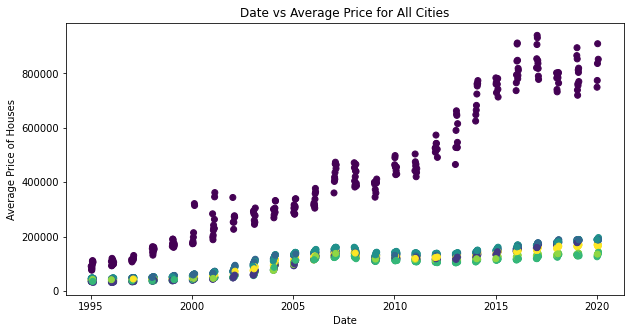

In [14]:
# Scatter graph 
plt.figure(figsize=[10, 5])
plt.title("Date vs Average Price for All Cities")
plt.ylabel("Average Price of Houses")
plt.xlabel("Date")
plt.scatter(X_train["Date"], y_train, c=X_train["RegionName"])

In [8]:
# Naive Training... train a single model for all data points, taking city name as an additional feature
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [19]:
# Evaluate using r^2
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.9992717794228363


In [ ]:
Decision Tree by Region
Split the data by City
Run one Decision Tree per City... so you end up with seven models

Train score for London is 1.0
Test score for London is 0.9993063168998927


Train score for Manchester is 1.0
Test score for Manchester is 0.9967469597593777


Train score for Birmingham is 1.0
Test score for Birmingham is 0.9993529697760146


Train score for Leeds is 1.0
Test score for Leeds is 0.9988164709989431


Train score for Liverpool is 1.0
Test score for Liverpool is 0.9944970910470493


Train score for Bradford is 1.0
Test score for Bradford is 0.9984115334969094


Train score for Sheffield is 1.0
Test score for Sheffield is 0.9991525878815322




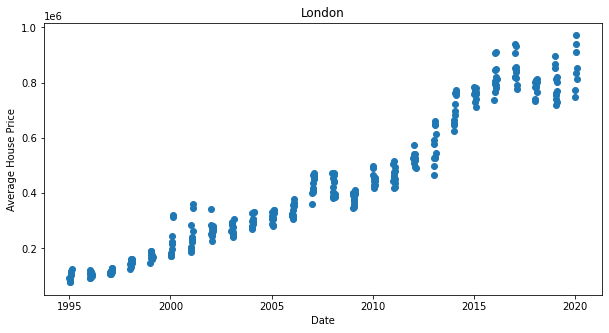

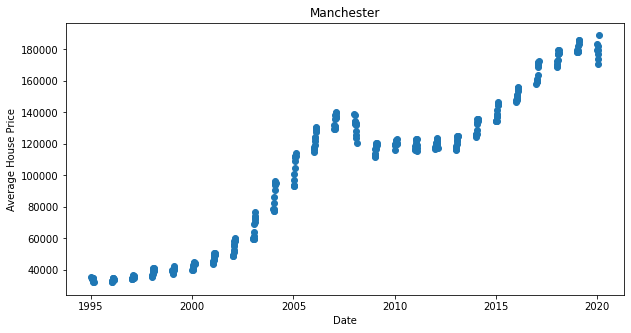

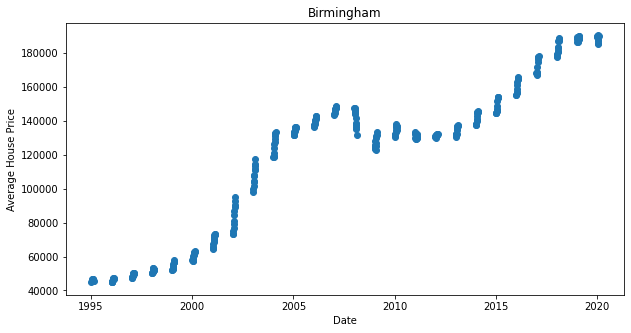

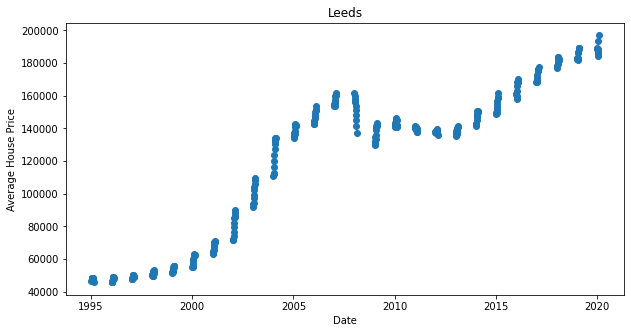

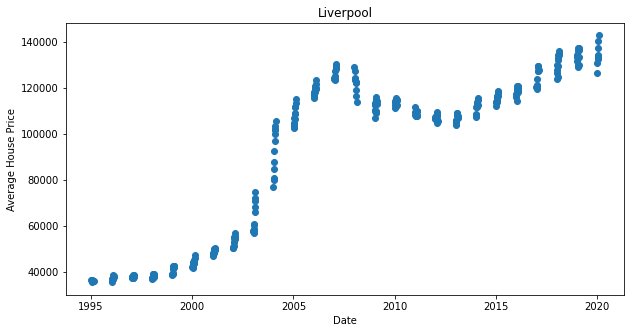

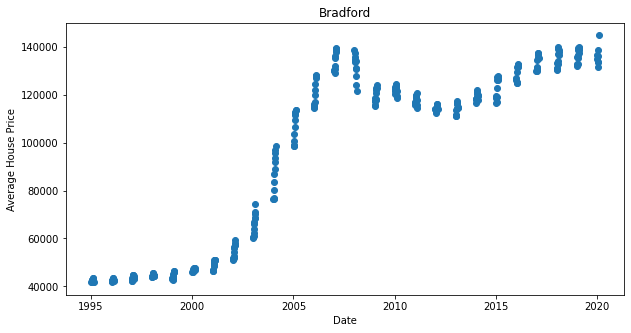

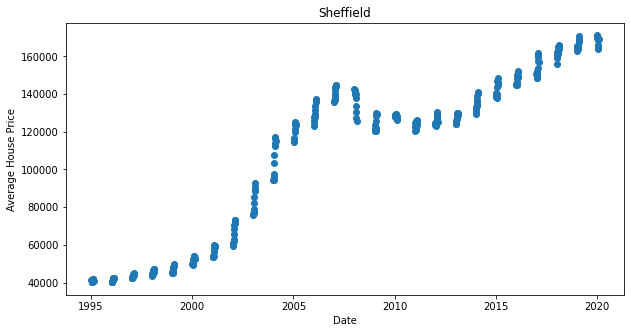

In [15]:
# city_to_number = {"City of London":1, "Manchester":2, "Birmingham":3, "Leeds":4, "Liverpool":5, "Bradford":6, "Sheffield":7}
london_model_1 = None
manchester_model_2 = None
birmingham_model_3 = None
leeds_model_4 = None
liverpool_model_5 = None
bradford_model_6 = None
sheffield_model_7 = None

name_to_model = {"London":{"id":1, "model":london_model_1}, "Manchester":{"id":2, "model":manchester_model_2}, "Birmingham":{"id":3, "model":birmingham_model_3}, "Leeds":{"id":4, "model":leeds_model_4}, "Liverpool":{"id":5, "model":liverpool_model_5}, "Bradford":{"id":6, "model":bradford_model_6}, "Sheffield":{"id":7, "model":sheffield_model_7}}

for model_name in name_to_model:
    city_number = name_to_model[model_name]["id"]

    #Data
    model_data = data[data["RegionName"] == city_number]
    model_features = model_data[feature_cols]
    model_target = model_data["AveragePrice"]

    X_mod_train, X_mod_test, y_mod_train, y_mod_test = train_test_split(model_features, model_target , test_size=0.2, random_state=10)

    plt.figure(figsize=[10, 5])
    plt.title(model_name)
    plt.xlabel("Date")
    plt.ylabel("Average House Price")
    plt.scatter(model_data["Date"], model_target)

    name_to_model[model_name]["model"] = DecisionTreeRegressor()
    name_to_model[model_name]["model"].fit(X_mod_train, y_mod_train)

    #Evaluate
    train_r2_key = f"{model_name}_train_r2"
    train_r2_value = name_to_model[model_name]["model"].score(X_mod_train, y_mod_train)

    test_r2_key = f"{model_name}_test_r2"
    test_r2_value = name_to_model[model_name]["model"].score(X_mod_test, y_mod_test)

    name_to_model[model_name][train_r2_key] = train_r2_value
    name_to_model[model_name][test_r2_key] = test_r2_value

    print(f"Train score for {model_name} is {train_r2_value}")
    print(f"Test score for {model_name} is {test_r2_value}")
    print("\n")






In [ ]:
Evaluation
We then evaluate the seven models in the name_to_model dictionary

In [18]:
for city_name in name_to_model:
    print(city_name)
    train_r2 = name_to_model[city_name][f"{city_name}_train_r2"]
    test_r2 = name_to_model[city_name][f"{city_name}_test_r2"]
    print(f"Train r2: {train_r2}")
    print(f"Test r2: {test_r2}")
    print("\n")

London
Train r2: 1.0
Test r2: 0.9993063168998927


Manchester
Train r2: 1.0
Test r2: 0.9967469597593777


Birmingham
Train r2: 1.0
Test r2: 0.9993529697760146


Leeds
Train r2: 1.0
Test r2: 0.9988164709989431


Liverpool
Train r2: 1.0
Test r2: 0.9944970910470493


Bradford
Train r2: 1.0
Test r2: 0.9984115334969094


Sheffield
Train r2: 1.0
Test r2: 0.9991525878815322


